In [1]:
import numpy as np
import pandas as pd

In [35]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [13]:
df=pd.read_csv("https://drive.google.com/uc?id=1-PkquU0_gbIsyI3WkoVjXBe5msVwazwo&export=download")
df.describe()

,cgpa,iq,placement
count,92.000000,96.000000,100.000000
mean,5.965217,117.916667,0.460000
std,1.164911,46.913508,0.500908
min,3.300000,1.000000,0.000000
25%,5.000000,90.000000,0.000000
50%,6.000000,122.000000,0.000000
75%,6.825000,146.750000,1.000000
max,8.500000,233.000000,1.000000


In [14]:
print(df)

           city  cgpa     iq  placement
0      New York   6.8  123.0          1
1   Los Angeles   5.9  106.0          0
2       Chicago   NaN  121.0          0
3      New York   7.4  132.0          1
4   Los Angeles   5.8  142.0          0
..          ...   ...    ...        ...
95      Chicago   4.3  200.0          0
96     New York   4.4   42.0          0
97  Los Angeles   6.7  182.0          1
98      Chicago   6.3  103.0          1
99     New York   6.2  113.0          1

[100 rows x 4 columns]


In [15]:
CGPA = df['cgpa'].fillna(df['cgpa'].mean())
IQ = df['iq'].fillna(df['iq'].mean())
new_data={'City': df.city, 'CGPA': CGPA, 'IQ': IQ, 'Placement': df.placement }
my_data=pd.DataFrame(new_data)
print(my_data)

           City      CGPA     IQ  Placement
0      New York  6.800000  123.0          1
1   Los Angeles  5.900000  106.0          0
2       Chicago  5.965217  121.0          0
3      New York  7.400000  132.0          1
4   Los Angeles  5.800000  142.0          0
..          ...       ...    ...        ...
95      Chicago  4.300000  200.0          0
96     New York  4.400000   42.0          0
97  Los Angeles  6.700000  182.0          1
98      Chicago  6.300000  103.0          1
99     New York  6.200000  113.0          1

[100 rows x 4 columns]


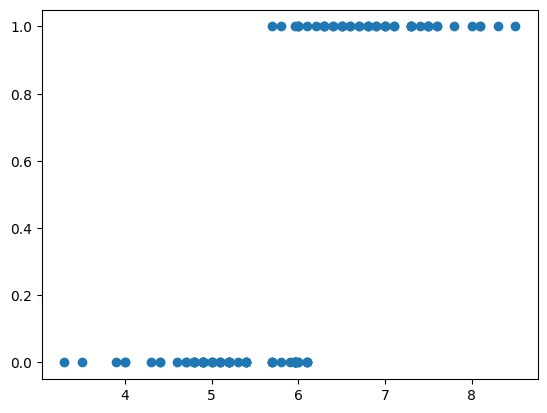

In [16]:
#Plot
x = my_data['CGPA']
y = my_data['Placement']

plt.scatter(x, y)
plt.show()

In [17]:
# Perform one-hot encoding for 'City' variable
data_encoded = pd.get_dummies(my_data, columns=['City'])

# Separate features and target variable
x = data_encoded.drop(columns=['Placement'])
y = data_encoded['Placement']
print(x)
print(y)

        CGPA     IQ  City_Chicago  City_Los Angeles  City_New York
0   6.800000  123.0         False             False           True
1   5.900000  106.0         False              True          False
2   5.965217  121.0          True             False          False
3   7.400000  132.0         False             False           True
4   5.800000  142.0         False              True          False
..       ...    ...           ...               ...            ...
95  4.300000  200.0          True             False          False
96  4.400000   42.0         False             False           True
97  6.700000  182.0         False              True          False
98  6.300000  103.0          True             False          False
99  6.200000  113.0         False             False           True

[100 rows x 5 columns]
0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: Placement, Length: 100, dtype: int64


In [32]:
#Splitting the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
print(x_test)

        CGPA          IQ  City_Chicago  City_Los Angeles  City_New York
70  6.300000  127.000000         False              True          False
25  5.000000   91.000000         False              True          False
83  7.500000  130.000000          True             False          False
39  4.600000  146.000000         False             False           True
46  5.300000  114.000000         False              True          False
2   5.965217  121.000000          True             False          False
86  5.100000  128.000000          True             False          False
62  6.000000  102.000000          True             False          False
18  4.000000  117.916667         False             False           True
30  7.600000  128.000000         False             False           True
3   7.400000  132.000000         False             False           True
51  4.800000  141.000000         False             False           True
32  7.000000  139.000000          True             False        

In [19]:
#Training the Logistic Regression model

regModel=LogisticRegression()
regModel.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred=regModel.predict(x_test)
print(y_pred)

[1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1]


In [37]:

def predict_placement(cgpa):
    # Assuming 'cgpa' is a single float representing the CGPA of the student
    # Convert CGPA to a numpy array for prediction
    cgpa_array = np.array(cgpa).reshape(1,-1)

    # Make prediction using the trained model
    placement_prediction = regModel.predict(cgpa_array)

    # Return the predicted placement status
    if placement_prediction == 1:
        return "Placed"
    else:
        return "Not Placed"

# Example usage
student_features = [7.6, 140, True,False,False]
placement_status = predict_placement(student_features)
print(f"Students with CGPA {student_features} is predicted to be {placement_status}")

Students with CGPA [7.6, 140, True, False, False] is predicted to be Placed


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
#Obtain performance parametrics in a classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.77      0.77      0.77        13

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30

